In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/output.csv')

In [111]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU:", gpu)
else:
    print("No GPU available, using CPU.")


GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [112]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted']])
encoded_labels = pd.get_dummies(data['mtd'])

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data[['mtd_freq', 'compromised_num']]], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [113]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer: 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.fit(X_train, y_train,epochs=100, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2852 - loss: 5.8118
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3320 - loss: 2.0976
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3314 - loss: 1.8456
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2950 - loss: 1.6757
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2415 - loss: 1.7717
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2981 - loss: 1.5128
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3060 - loss: 1.4619
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3319 - loss: 1.4118
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3538 - loss: 1.4192
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3464 - loss: 1.5173
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3509 - loss: 1.4090
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4208 - lo

In [115]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4536 - loss: 1.0918


[1.0081708431243896, 0.47727271914482117]

With metrics as target values

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [148]:
# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/metrics/simulation_metrics.csv')

In [149]:
import tensorflow as tf

# Assuming X_train and y_train are your training data and labels
# X_train.shape[1] is the number of features in your input data

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)  # Output layer with 3 neuron for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])  # You can add additional metrics like Mean Absolute Error (MAE)


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted', 'mtd']])
targets = data[['roa', 'impact', 'complexity']]

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data.drop(['curr_attack', 'interrupted', 'mtd', 'roa', 'impact', 'complexity'], axis=1)], axis=1)
features = features.drop("x_10000", axis=1)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [151]:
X_train, y_train

(      0    1    2    3    4    5    6    7    8    9  ...  x_5000  x_5500  \
 12  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     0.0     0.0   
 4   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     0.0     0.0   
 37  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     6.0     9.0   
 8   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...     0.0     0.0   
 3   0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  ...     0.0     0.0   
 6   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...     0.0     0.0   
 41  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  ...     6.0     9.0   
 46  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...     6.0     9.0   
 47  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...     6.0     9.0   
 15  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...     0.0     0.0   
 9   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     0.0     0.0   
 16  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...     0

In [152]:
model.fit(X_train, y_train,epochs=200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 83.8700 - mae: 7.4520
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 23.3918 - mae: 4.0503
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.9943 - mae: 1.9454
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12.0438 - mae: 2.4035
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.9981 - mae: 2.7518
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.7928 - mae: 2.6702
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.1835 - mae: 2.2748
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.8189 - mae: 1.7448
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.8808 - mae: 1.4115
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.5218 - mae: 1.2849
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.3938 - mae: 1.2794
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2349 - mae: 1.3507
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26

In [153]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.1103 - mae: 0.2078
Test loss: 0.11030024290084839, Test accuracy: 0.20782466232776642


In [154]:
y_pred = model.predict(X_test)# Plot predicted vs actual values
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 6.21095   ,  4.975697  ,  0.50890344],
       [11.468366  ,  4.991055  ,  0.5927972 ],
       [12.760562  ,  4.88564   ,  0.5520267 ],
       [11.206697  ,  5.0467525 ,  0.7722778 ],
       [18.423183  ,  4.730998  ,  0.30904523],
       [10.755659  ,  5.0182037 ,  0.5662274 ],
       [14.093618  ,  5.1330686 ,  0.8299069 ],
       [15.075996  ,  5.1143527 ,  0.73296684],
       [12.836745  ,  4.816085  ,  0.5013551 ],
       [18.95535   ,  4.7499576 ,  0.3903083 ]], dtype=float32)

In [155]:
import seaborn as sns

<Axes: >

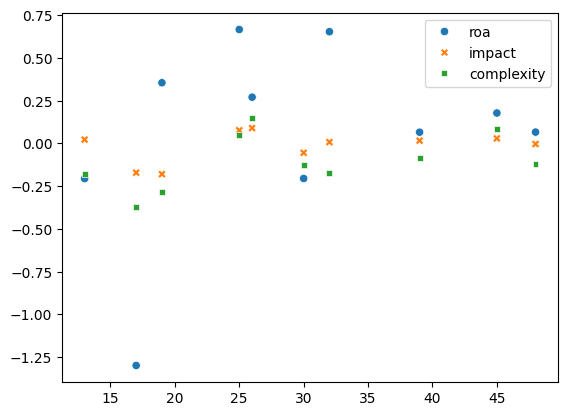

In [156]:
sns.scatterplot(y_pred - y_test)

In [158]:
(y_pred - y_test)['roa']

13   -0.206101
39    0.065057
30   -0.205467
45    0.177250
17   -1.298375
48    0.065658
26    0.269782
25    0.665451
32    0.652447
19    0.354122
Name: roa, dtype: float64

In [164]:
y_pred[:,0], y_test['roa']

(array([ 6.21095 , 11.468366, 12.760562, 11.206697, 18.423183, 10.755659,
        14.093618, 15.075996, 12.836745, 18.95535 ], dtype=float32),
 13     6.417051
 39    11.403308
 30    12.966029
 45    11.029447
 17    19.721559
 48    10.690001
 26    13.823837
 25    14.410546
 32    12.184298
 19    18.601229
 Name: roa, dtype: float64)